In [101]:
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
# change filename but make sure to use a raw_history.csv file 
df = pd.read_csv('2024-10-12_1519_1.raw_history.csv')

In [103]:
# Remove leading and trailing spaces in the column
df[' Rise speed (m/s)'] = df[' Rise speed (m/s)'].str.strip()
# Replace non-numeric values with NaN
df[' Rise speed (m/s)'] = pd.to_numeric(df[' Rise speed (m/s)'], errors='coerce')
# Drop rows with NaN values in the ' Speed (m/s)' column
cut_start = df.dropna(subset=[' Rise speed (m/s)'])
# Convert to float
df[' Rise speed (m/s)'] = df[' Rise speed (m/s)'].astype(float)

In [105]:
# remove falling data
df = df[df[' Rise speed (m/s)'] > 0]

In [98]:
# Extract relevant columns (adjust column names as needed)
pressure = df[' Pressure (Pascal)'] / 100  # Convert from Pa to hPa
temperature = df[' Temperature (C)']
humidity = df[' Relative humidity (%)']

# Calculate dew point temperature from temperature and humidity
from metpy.calc import dewpoint_from_relative_humidity
from metpy.units import units

temperature = temperature.values * units.degC
humidity = humidity.values / 100.0  # Convert to fraction
dewpoint = dewpoint_from_relative_humidity(temperature, humidity)

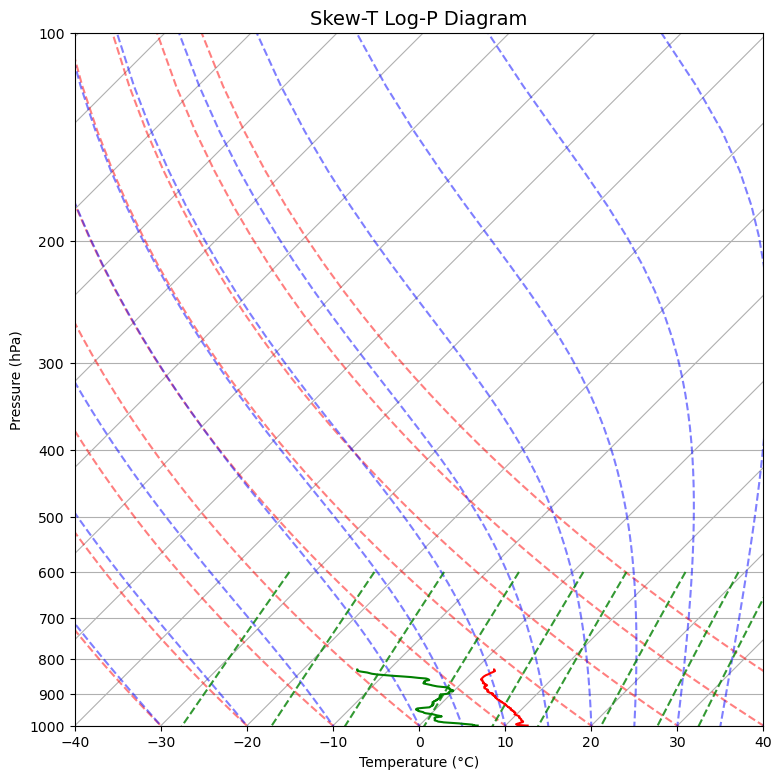

In [107]:
# Initialize the figure and skew-T plot
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig, rotation=45)

# Plot data on the Skew-T diagram
skew.plot(pressure, temperature, 'r')  # Temperature in red
skew.plot(pressure, dewpoint, 'g')     # Dewpoint in green

# Add additional lines for better visualization
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

# Set axis limits
skew.ax.set_ylim(1000, 100)  # Pressure from 1000 to 100 hPa
skew.ax.set_xlim(-40, 40)    # Temperature range

# Add labels and title
plt.title('Skew-T Log-P Diagram', fontsize=14)
plt.xlabel('Temperature (°C)')
plt.ylabel('Pressure (hPa)')

# Show the plot
plt.show()